In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime
import seaborn as sns

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


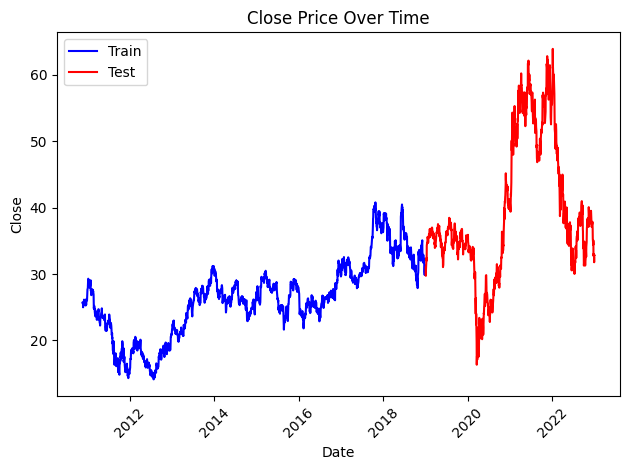

In [2]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GM',start_date,end_date,period,2019)
data.data_preprocess()

## MULTIKUTI

Running GA with crossover=0.1, mutation=0.01
Run 1/5
Running multikuti
Generation 1: Best fitness = 5.3284062758384705  Average Fitness = 2.0157136304513843
Generation 2: Best fitness = 5.3284062758384705  Average Fitness = 3.010096904101004
Generation 3: Best fitness = 5.632256267568257  Average Fitness = 3.561536112137225
Generation 4: Best fitness = 6.668355686511742  Average Fitness = 3.7257836251873804
Generation 5: Best fitness = 6.668355686511742  Average Fitness = 4.251318027491645
Generation 6: Best fitness = 6.791435660518015  Average Fitness = 4.711940708320331
Generation 7: Best fitness = 6.892855511192065  Average Fitness = 4.880162889308753
Generation 8: Best fitness = 6.892855511192065  Average Fitness = 5.058596540830411
Generation 9: Best fitness = 6.892855511192065  Average Fitness = 5.489056458976347
Generation 10: Best fitness = 7.293610907877472  Average Fitness = 5.570490725227579
Island 0 Migration -Left island 7 -Right island 1
Island 1 Migration -Left island 0 

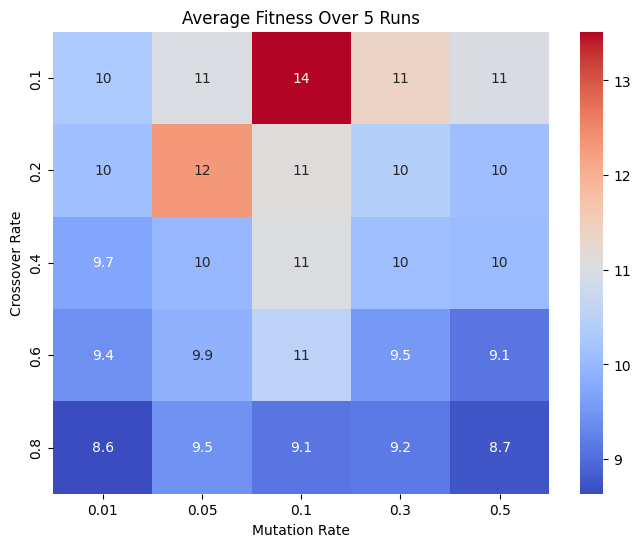

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


# Define crossover and mutation rates
crossover_rates = [0.1, 0.2, 0.4, 0.6, 0.8]
mutation_rates = [0.01, 0.05, 0.1, 0.3, 0.5]

# Dictionary to store results
convergence_results = {}

# Number of runs for each combination
n_runs = 5

# Loop through all combinations
for r_cross, r_mut in product(crossover_rates, mutation_rates):
    print(f"Running GA with crossover={r_cross}, mutation={r_mut}")
    
    # Store multiple runs
    all_runs = []
    
    # Perform multiple runs
    for run in range(n_runs):
        print(f"Run {run + 1}/{n_runs}")
        ga = IslandGGA(data=data.train_data, num_islands=8, m_iter=10, num_iter=40,
                       pSize=100, r_cross=r_cross, r_mut=r_mut,
                      strategies=data.strategies, evolve_strategy="multikuti")
        ga.evolve()
        fitness = ga.globalBest.fitness_value # Get the best fitness value
        all_runs.append(fitness)
    
    # Calculate average convergence values across runs
    avg_convergence = np.mean(all_runs, axis=0)
    convergence_results[(r_cross, r_mut)] = avg_convergence

# Save results
np.save("crossover_mutation_avg.npy", convergence_results)

# Plot average results
# Convert results to a 2D array for heatmap plotting
fitness_results = np.load("crossover_mutation_avg.npy", allow_pickle=True).item()
fitness_matrix = np.array([[fitness_results[(c, m)] for m in mutation_rates] for c in crossover_rates])

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fitness_matrix, annot=True, xticklabels=mutation_rates, yticklabels=crossover_rates, cmap="coolwarm")
plt.xlabel("Mutation Rate")
plt.ylabel("Crossover Rate")
plt.title(f"Average Fitness Over {n_runs} Runs")
plt.show()


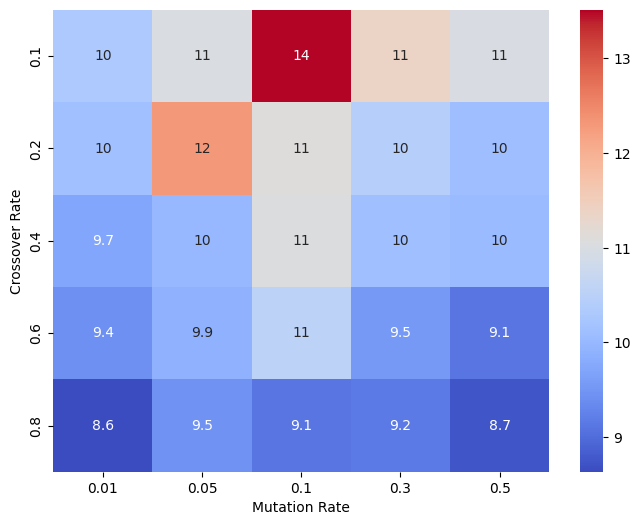

In [12]:
# Plot average results
# Convert results to a 2D array for heatmap plotting
fitness_results = np.load("crossover_mutation_avg.npy", allow_pickle=True).item()
fitness_matrix = np.array([[fitness_results[(c, m)] for m in mutation_rates] for c in crossover_rates])

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fitness_matrix, annot=True, xticklabels=mutation_rates, yticklabels=crossover_rates, cmap="coolwarm")
plt.xlabel("Mutation Rate")
plt.ylabel("Crossover Rate")
#plt.title(f"Average Fitness Over {n_runs} Runs")
plt.show()

## RING

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


# Define crossover and mutation rates
crossover_rates = [0.1, 0.2, 0.4, 0.6, 0.8]
mutation_rates = [0.01, 0.05, 0.1, 0.3, 0.5]

# Dictionary to store results
convergence_results = {}

# Number of runs for each combination
n_runs = 5

# Loop through all combinations
for r_cross, r_mut in product(crossover_rates, mutation_rates):
    print(f"Running GA with crossover={r_cross}, mutation={r_mut}")
    
    # Store multiple runs
    all_runs = []
    
    # Perform multiple runs
    for run in range(n_runs):
        print(f"Run {run + 1}/{n_runs}")
        ga = IslandGGA(data=data.train_data, num_islands=8, m_iter=10, num_iter=40,
                       pSize=100, r_cross=r_cross, r_mut=r_mut,
                      strategies=data.strategies, evolve_strategy="ring")
        ga.evolve()
        fitness = ga.globalBest.fitness_value # Get the best fitness value
        all_runs.append(fitness)
    
    # Calculate average convergence values across runs
    avg_convergence = np.mean(all_runs, axis=0)
    convergence_results[(r_cross, r_mut)] = avg_convergence

# Save results
np.save("crossover_mutation_avg.npy", convergence_results)

# Plot average results
# Convert results to a 2D array for heatmap plotting
fitness_results = np.load("crossover_mutation_avg.npy", allow_pickle=True).item()
fitness_matrix = np.array([[fitness_results[(c, m)] for m in mutation_rates] for c in crossover_rates])

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fitness_matrix, annot=True, xticklabels=mutation_rates, yticklabels=crossover_rates, cmap="coolwarm")
plt.xlabel("Mutation Rate")
plt.ylabel("Crossover Rate")
plt.title(f"Average Fitness Over {n_runs} Runs")
plt.show()


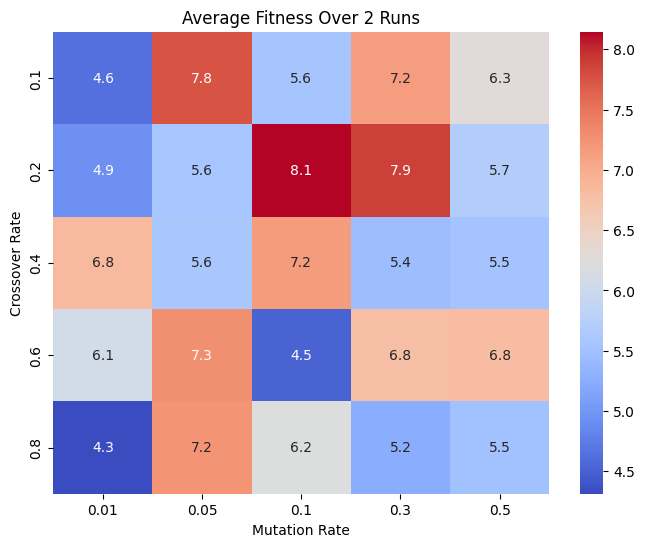

In [9]:
# Convert results to a 2D array for heatmap plotting
fitness_results = np.load("crossover_mutation_avg.npy", allow_pickle=True).item()
fitness_matrix = np.array([[fitness_results[(c, m)] for m in mutation_rates] for c in crossover_rates])

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fitness_matrix, annot=True, xticklabels=mutation_rates, yticklabels=crossover_rates, cmap="coolwarm")
plt.xlabel("Mutation Rate")
plt.ylabel("Crossover Rate")
plt.title(f"Average Fitness Over {n_runs} Runs")
plt.show()